In [127]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday/train.csv
/kaggle/input/black-friday/test.csv


In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [129]:
df = pd.read_csv("/kaggle/input/black-friday/train.csv")

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [131]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [132]:
df.drop(['User_ID'], axis=1, inplace = True)

In [133]:
print(df['Gender'].unique())

['F' 'M']


In [134]:
df['Gender'] = df['Gender'].map({'F':1, 'M':0})

In [135]:
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [136]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [137]:
df['Age'] = df['Age'].astype(str).map({
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+': 7
})
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,1,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,1,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,0,7,16,C,4+,0,8,NaN,NaN,7969


In [138]:
print(df['Age'].unique())
print(df['Age'].dtype)
print(df['Age'].head(10).tolist())

[1 7 3 5 6 4 2]
int64
[1, 1, 1, 1, 7, 3, 5, 5, 5, 3]


In [139]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [140]:
df['City_Category'] = df['City_Category'].map({'A':1, 'B':2, 'C':3})
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,NaN,NaN,8370
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,1,2,0,12,NaN,NaN,1422
3,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057
4,P00285442,0,7,16,3,4+,0,8,NaN,NaN,7969


In [141]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [142]:
df['Product_Category_2'].mode()[0]

8.0

In [143]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])
df['Product_Category_2'].isnull().sum()

0

In [144]:
df['Product_Category_3'].isnull().sum()
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()

0

In [145]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,0,7,16,3,4+,0,8,8.0,16.0,7969


In [146]:
# df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].map({'4+':4})
# df.head()
#leaves all other values as NaN as they wont be defined

In [152]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [153]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969


In [154]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

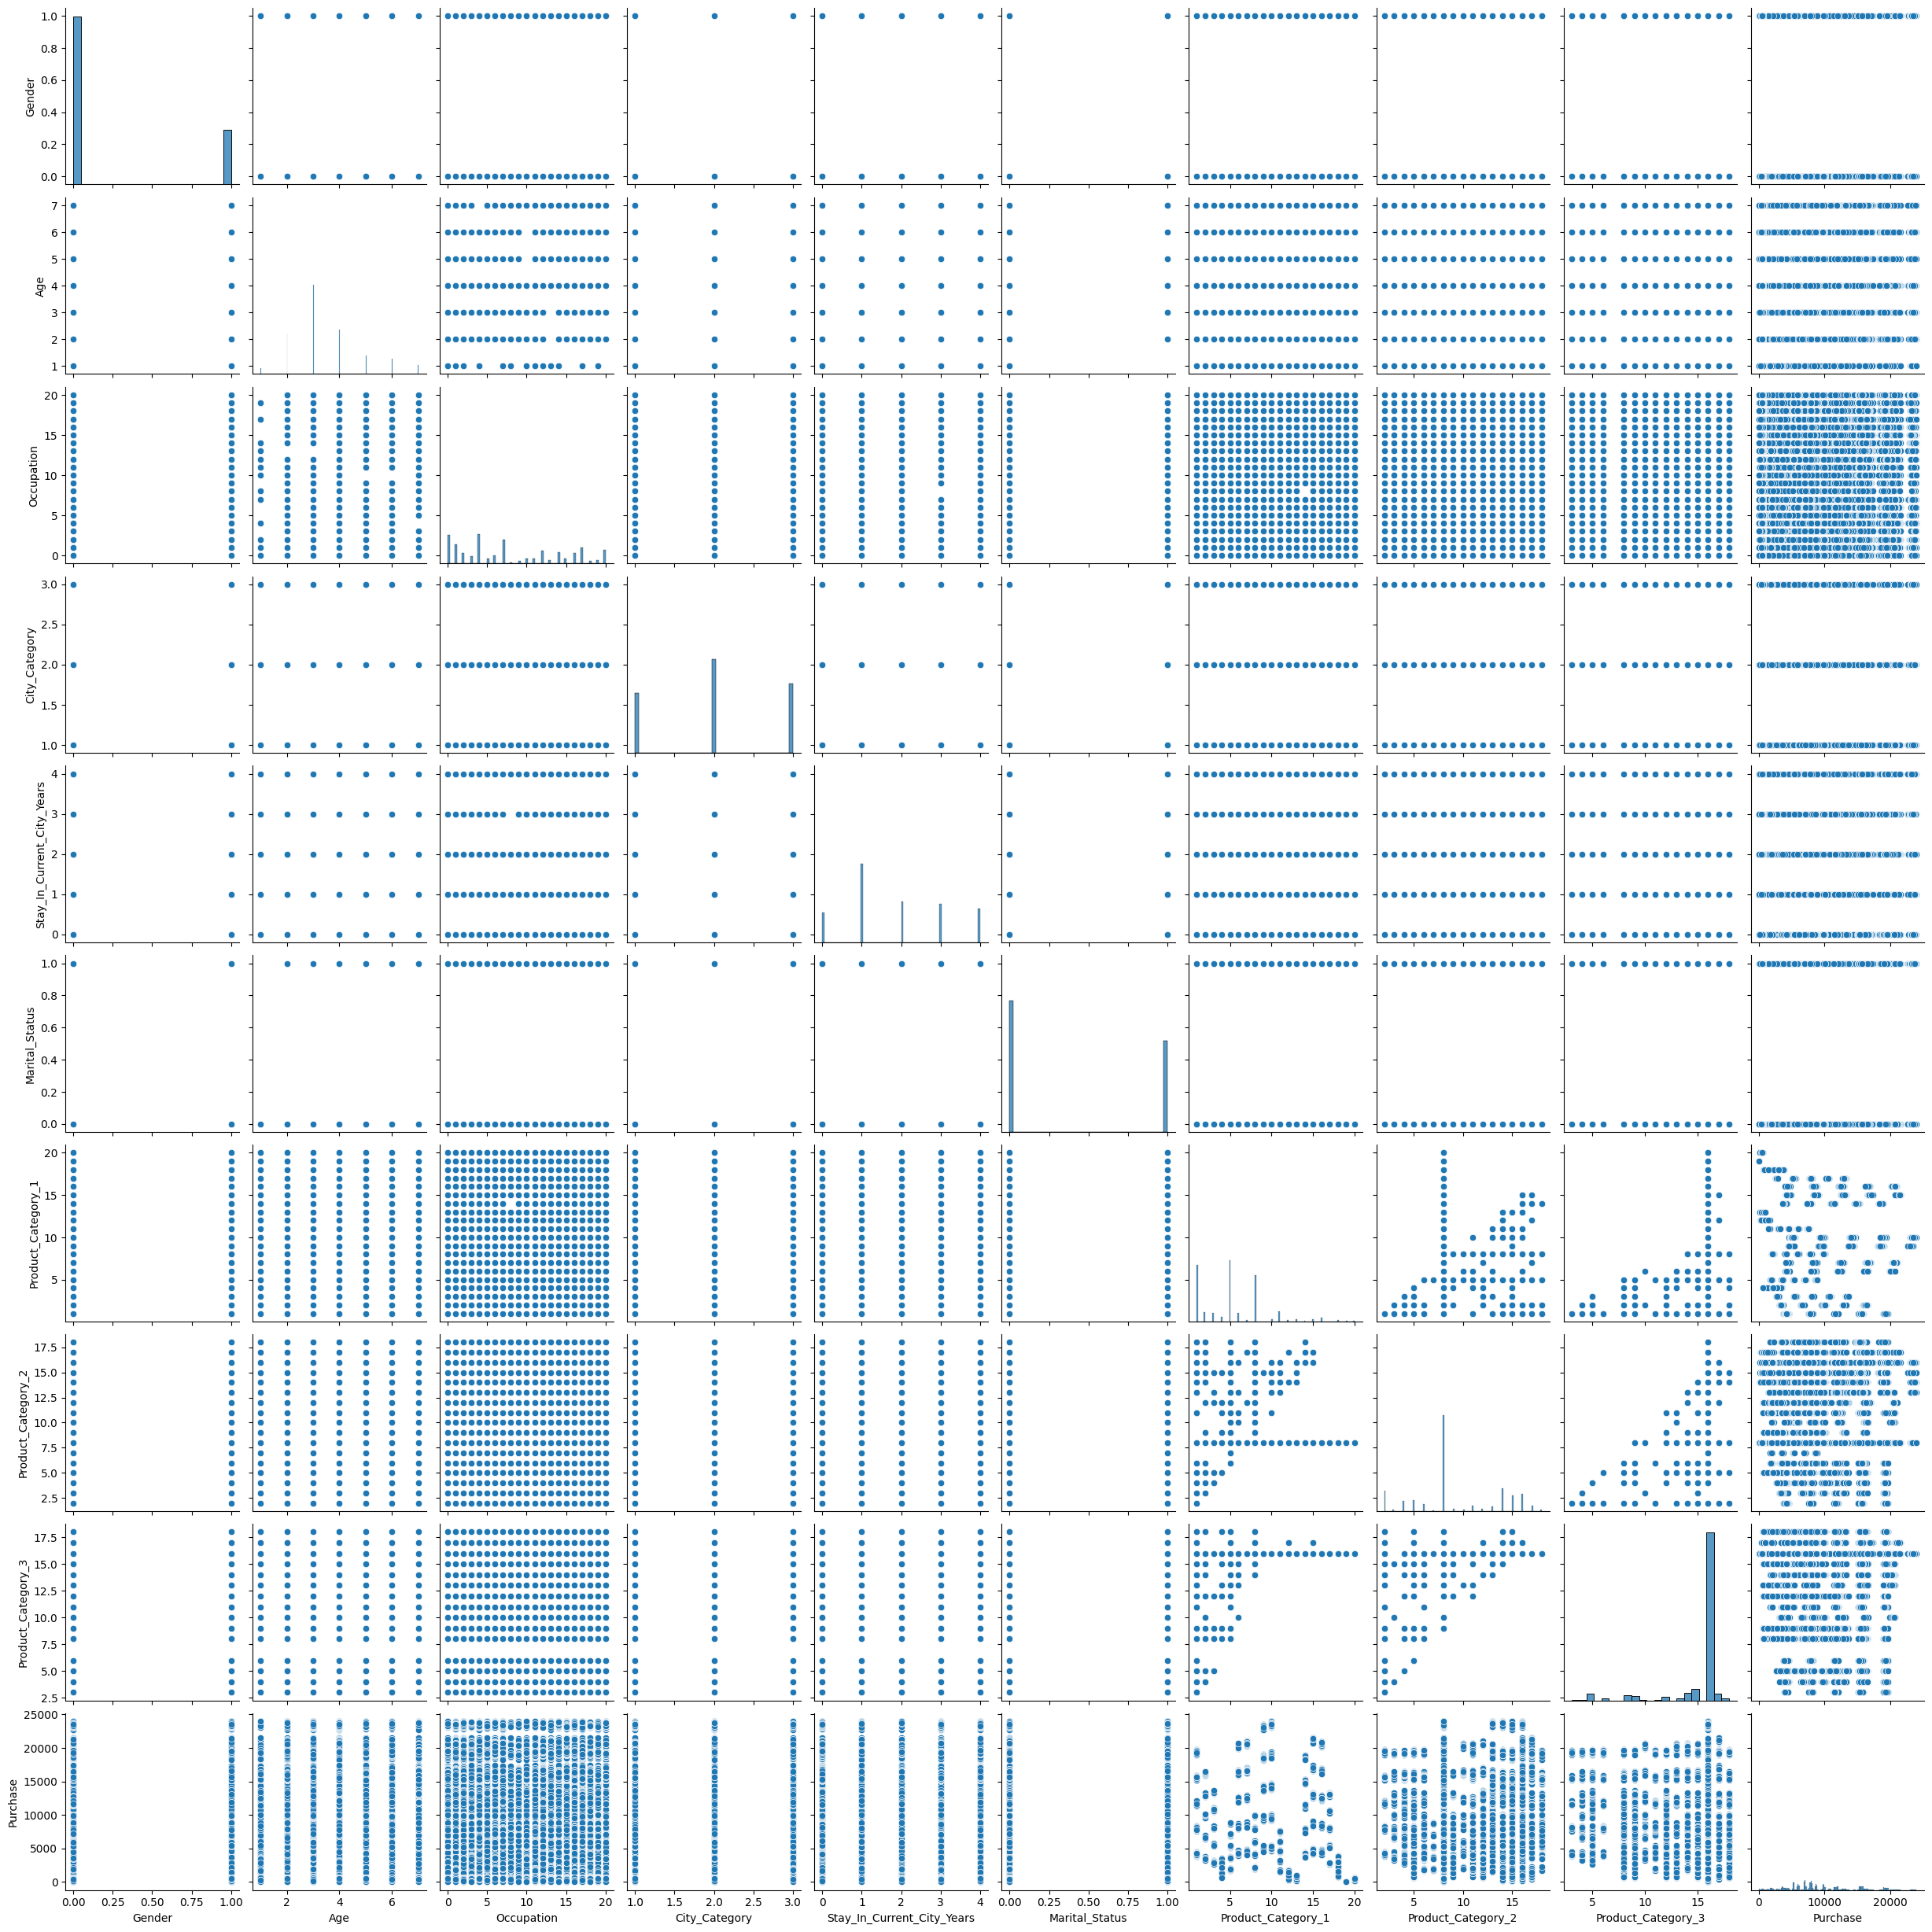

In [155]:
sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

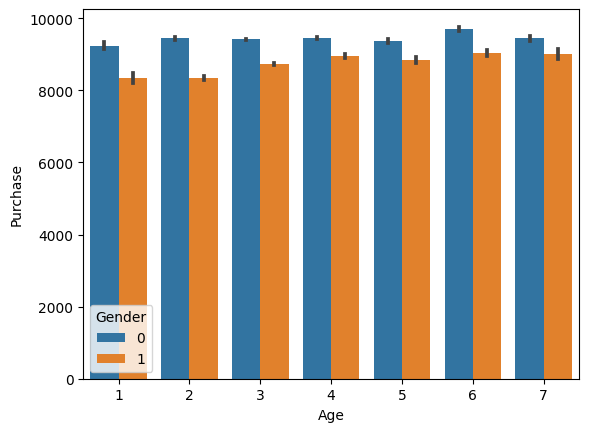

In [157]:
sns.barplot(x='Age', y='Purchase', hue = 'Gender', data = df)

In [160]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]

In [162]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,0,6,13,2,1,1,20,8.0,16.0,368
550064,P00375436,1,3,1,3,3,0,20,8.0,16.0,371
550065,P00375436,1,3,15,2,4,1,20,8.0,16.0,137
550066,P00375436,1,7,1,3,2,0,20,8.0,16.0,365


In [168]:
X = df_train
y = df['Purchase']

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)